# T-student
La distribucion de t-student parte de la distribucion normal pero bajo la premisa de que una muestra pequeña dificilmente se puede obtener una distribucion normal, es debido a esto que se incorporan los grados de libertad, los cuales tienen el fin de darle una forma normal a la distribucion. Otra cosa que tambien es de suma importancia es que **al tratarse de distribuciones muestrales es mejor emplear el error standard en lugar de la desviacion standard lo que tambien aplica para trabajar con la distribucion normal siempre y cuando se trabaje con muestras**.

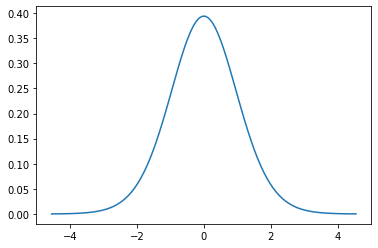

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

rv = st.t(df=20, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.plot(x,y)
plt.show()

# Efecto de los grados de libertad
Si uno observa a menor grados de libertad la distribucion va haciendose mas y mas plana.

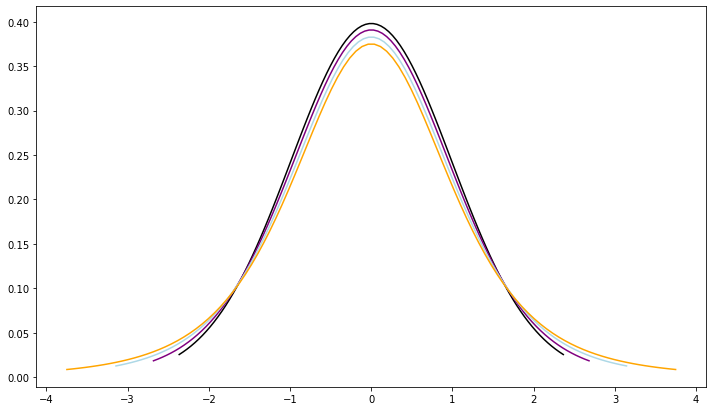

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

rv = st.t(df=100, loc=0, scale=1)
x = np.linspace(rv.ppf(0.01), rv.ppf(0.99), 100)
y = rv.pdf(x) 

rv_1 = st.t(df=12, loc=0, scale=1)
x_1 = np.linspace(rv_1.ppf(0.01), rv_1.ppf(0.99), 100)
y_1 = rv_1.pdf(x_1) 

rv_2 = st.t(df=6, loc=0, scale=1)
x_2 = np.linspace(rv_2.ppf(0.01), rv_2.ppf(0.99), 100)
y_2 = rv_2.pdf(x_2) 

rv_3 = st.t(df=4, loc=0, scale=1)
x_3 = np.linspace(rv_3.ppf(0.01), rv_3.ppf(0.99), 100)
y_3 = rv_3.pdf(x_3) 

plt.figure(figsize=(12,7))

plt.plot(x,y, color='black')
plt.plot(x_1,y_1, color='purple')
plt.plot(x_2,y_2, color='lightblue')
plt.plot(x_3,y_3, color = 'orange')
plt.show()

# Condiciones

## Condiciones para datos numericos

- Supuesto de independencia: los valores muestreados deben ser independientes entre sí.

- Condición de aleatorización: los datos deben ser representativos de la población y seleccionados al azar.

- 10% Condición: el tamaño de la muestra, n, no debe ser mayor al 10% de la población.

- Condición Casi Normal: Los datos provienen de una distribución que es unimodal y simétrica. Esto se puede comprobar haciendo un histograma. Los modelos t de Student no funcionarán con datos muy sesgados.

## Condiciones para datos categoricos
- Supuesto de independencia: los valores muestreados deben ser independientes entre sí.

- Condición de aleatorización: los datos deben ser representativos de la población y seleccionados al azar.

- 10% Condición: el tamaño de la muestra, n, no debe ser mayor al 10% de la población.

- Exito/Fracaso: np≥10 y nq≥10

# Intervalos de confianza
Los intervalos de confianza se hallan de forma muy similar 

## Para datos categoricos
Para trabajar con data categorica es necesario emplear proporciones en lugar de valores numericos. En este caso la funcion para hallar los intervalos es diferente:

$$error = t_{n-1}\cdot{\sqrt{\frac{\hat{p}\cdot{\hat{q}}}{n}}}$$

$$\text{Intervalo bajo}= \hat{p} - error$$

$$\text{Intervalo alto}= \hat{p} + error$$

### Ejemplo
Supongamos que tomamos una muestra de compradores dentro de una tienda donde 30% son varones, la muestra se compone de 300 personas, de modo que queremos saber el intervalo en el que se encuentra la proporcion de la poblacion en el caso de varones, con un nivel de confianza del 95%.

#### Probabilidad de exito($\hat{p}$)

In [ ]:
p = 0.3

#### Probabilidad de fracaso($\hat{q}$)

In [ ]:
q = 1 - p

#### Tamaño de la muestra($n$)

In [ ]:
n = 300

#### Grados de libertad($df$)

In [ ]:
df = n - 1

#### Valor t($t$)

In [ ]:
t_val = st.t(df).ppf(0.975)
t_val

1.9679296690653618

#### Error

In [ ]:
error = t_val * np.sqrt((p * q)/n)
error

0.05206652502012587

#### Intervalo bajo

In [ ]:
p - error

0.2479334749798741

#### Intervalo alto

In [ ]:
p + error

0.35206652502012586

De este modo podriamos decir que la media poblacional se encuentra entre 0.2479334749798741 y 0.35206652502012586, con un nivel de confianza del 95%.

## Para datos numericos
Empleando datos numericos la formula para hallar estos intervalos es la siguiente:
$$error = (t_{n-1}\cdot{\frac{\text{desviacion standard}}{\sqrt{\text{Tamaño de la muestra}}}})$$

$$\text{Intervalo bajo}= \text{media muestral} - error$$

$$\text{Intervalo alto}= \text{media muestral} + error$$

### Ejemplo
Supongamos que tenemos una muestra de 300 elementos, con una media de 50 y una desviacion standard de 8. Ahora queremos saber dentro de que intervalo se encuentra la media poblacional, con un nivel de confianza del 95%.

#### Media($\mu$)

In [ ]:
m = 50

#### Desv. Standard($s$)

In [ ]:
std = 8

#### Tamaño de la muestra($n$)

In [ ]:
n = 300

#### Grados de libertad($df$)

In [ ]:
df = n - 1
df

299

#### valor t($t$)

In [ ]:
t_val = st.t(df).ppf(0.975)
t_val

1.9679296690653618

#### Error

In [ ]:
error = t_val * (std/np.sqrt(n))
error

0.9089477793449101

#### Intervalo bajo

In [ ]:
m - error

49.09105222065509

#### Intervalo alto

In [ ]:
m + error

50.90894777934491

Aca podriamos decir que la media poblacional se encuentra entre 49.09105222065509 y 50.90894777934491 con un nivel de confianza del 95%.

# Pruebas de hipotesis
Las pruebas de hipotesis empleando la t de student poseen la misma logica que dentro de la distribucion normal.

## Pasos para definir hipotesis empleando una muestra

Hasta ahora hemos definido nuestras hipotesis de una forma bastante intuitiva pero realmente debemos tomar en cuenta algunas normas de nomenclatura para poder definirlas:

|Hipotesis|Dos colas(diferente)|Una cola positiva(mayor)|Una cola negativa(menor)|
|---|---|---|---|
|$H_0$|$H_0: \mu= \mu_0$|$H_0: \mu= \mu_0$|$H_0: \mu= \mu_0$|
|$H_a$|$H_a: \mu \ne \mu_0$|$H_a: \mu > \mu_0$|$H_a: \mu < \mu_0$|

Donde:

- $H_0$, es la hipotesis nula.
- $H_a$, es la hipotesis alterna.
- $\mu$, es la media muestral.
- $\mu_0$, es la media poblacional.

Estos pasos son tambien aplicables a la distribucion normal.

## Pasos
Podemos establecer algunos pasos para realizar pruebas de hipotesis los cuales son tambien validos para la distribucion normal, claro que son sus respectivas modificaciones, estos pasos son:

- Establecer la hipotesis nula y la alterna.
- Revisar si cumple con las condiciones.
- Calcular las mecanicas:
  - Error standard para muestras y desviacion estandard para poblaciones.
  - Calcular el estadistico t(para distribucion normal estadistico z).
- Tomar una decision.

## Ejemplo de forma grafica
En esta ocasion tomaremos un ejemplo simple, el cual es en base a una fabrica de baterias la cual quiere saber si sus nuevas baterias pueden durar mas de 5 horas(300 minutos), de modo que toman la siguiente muestra:

`sample = [321, 295, 332, 351, 281, 336, 311, 253, 270, 326, 311, 288]`

Para el ejemplo vamos a suponer que la muestra cumple con todas las condiciones.

In [ ]:
sample = [321, 295, 332, 351, 281, 336, 311, 253, 270, 326, 311, 288]

### Estableciendo hipotesis

|Estableciendo hipotesis nula|Estableciando hipotesis alterna|
|---|---|
|$H_0:p = 300$|$H_a:p > 300$|

### Error standard
En esta ocasion se emplea el error standard en lugar de la desviacion standard, la logica detras de esto es la misma que detras del teorema del limite central, ya que se trata de una muestra se simula la toma de multiples muestras y es debido a esto que se emplea el **error standard**. La formula para generar este error standard es la misma que se vio en la distribucion normal en la parte del teorema del limite central:

$$\text{standard error} = \frac{\text{sample standard deviation}}{\sqrt{n}}$$

Donde:

- Standard error, es el error standard.
- Sample standard deviation, es la desviacion standard de la muestra.
- n, es el tamaño de la muestra.

In [ ]:
se = np.std(sample, ddof=1) / np.sqrt(len(sample))

### Grados de libertad

Como ya se menciono los grados de libertad son los que se encargan de refinar la forma de campana dentro de la distribucion, esta esta dada por la formula:

$$df = n - 1$$

Donde:

- df, Son los grados de libertad(degrees of freedom).
- n, es el tamaño de la muestra.

In [ ]:
df = len(sample) - 1
df

11

### Media de la muestra

Ya que se va a contruir una distribucion normal es requerida una media como medida de tendencia central.

In [ ]:
m = np.mean(sample)
m

306.25

### Distribucion

Ahora es posible construir la distribucion.

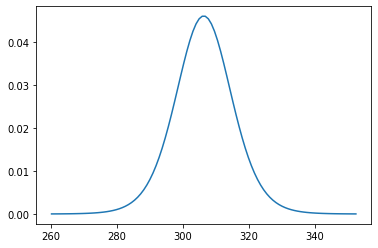

In [ ]:
distribution = st.t(loc= m, scale= se, df= df)

x = np.linspace(distribution.ppf(0.0001), distribution.ppf(0.9999), 100)
y = distribution.pdf(x) 

plt.plot(x,y)
plt.show()

### Estableciendo 95% mayor

Siguiendo con el criterio de las pruebas de hipotesis es necesario definir un punto de acuerdo al cual se partira para determinar si es que la nueva distribucion es diferente o no de acuerdo a un intervalo de confianza, en este caso se quiere ver la cola superior con un nivel de confianza de 95%.

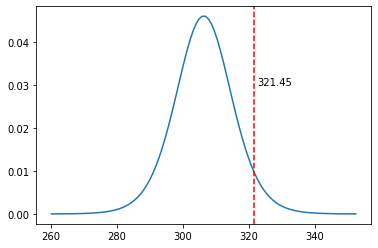

In [ ]:
f = distribution.ppf(0.95)

plt.plot(x,y)
plt.axvline(f, color='red', ls='--')
plt.text(f + 1, 0.03, round(f, 2))
plt.show()

### Contrastando con la distribucion hipotetica con la que se desea contrastar

Una vez se tiene la nueva distribucion es posible contrastar esta con una hipotetica nueva distribucion la cual posee la media de 300(la poblacion esperada), de este modo es posible ver la probabilidad de obtener esta media dentro de la nuestra distribucion.

In [ ]:
n = distribution.cdf(300)

n

0.23778922735685531

### Decision
De forma grafica al estar la media de la muestra hipotetica por debajo del intervalo de 95% es posible fallar en rechazar la hipotesis nula.

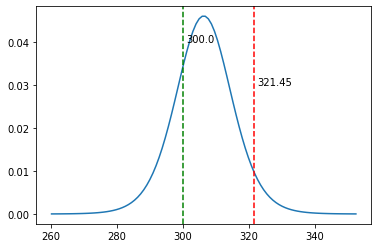

In [ ]:
th = distribution.ppf(n)

plt.plot(x,y)
plt.axvline(f, color='red', ls='--')
plt.axvline(th, color='green', ls='--')
plt.text(f + 1, 0.03, round(f, 2))
plt.text(th + 1, 0.04, th)
plt.show()

Es posible observar que ambas ambas graficas se encuentran muy cerca de modo que es posible afirmar que pertenecen a la misma distribucion.

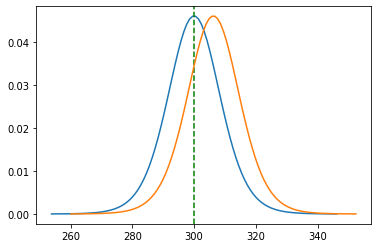

In [ ]:
n_distribution = st.t(loc= 300, scale= se, df= df)

n_x = np.linspace(n_distribution.ppf(0.0001), n_distribution.ppf(0.9999), 100)
n_y = n_distribution.pdf(n_x) 

plt.plot(n_x,n_y)
plt.axvline(th, color='green', ls='--')
plt.plot(x,y)
plt.show()

Algo importante aca es que la unica forma de rechazar la hipotesis nula es en caso de que busquemos un dato mayor a 321.54. Como muestra la siguiente grafica.

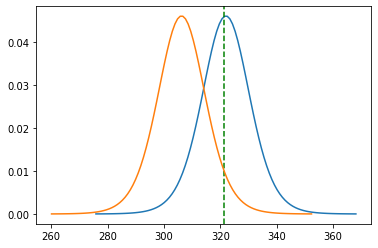

In [ ]:
n_distribution = st.t(loc= 322, scale= se, df= df)

n_x = np.linspace(n_distribution.ppf(0.0001), n_distribution.ppf(0.9999), 100)
n_y = n_distribution.pdf(n_x) 

plt.plot(n_x,n_y)
plt.axvline(f, color='green', ls='--')
plt.plot(x,y)
plt.show()

## Ejemplo empleando valores z

Algo importante aca es que los valores z en la distribucion t-student son diferentes, estos son mas conocidos como valores t los cuales poseen una formula diferente a la de los valores z pero llevan por detras el mismo principio de aplicacion que los valores z.

### Error standard

In [ ]:
se

8.461253041382408

### Grados de libertad

In [ ]:
df

11

### Media de la muestra

In [ ]:
m

306.25

### Estadistico t
El estadistico **t** es el equivalente a los grados **z** de la distribucion normal, esta emplea la siguiente formula:

$$t = \frac{x - \hat{u}}{se}$$

Donde:

t = Estadistico t.

x = Valor que se busca.

$\hat{u}$ = Media de la muestra.

se = Standard Error.

In [ ]:
t = (m - 300) / se
t

0.7386612797693696

In [ ]:
p = 1 - st.t(df=df).cdf(t)
p

0.23778922735685537

### De forma grafica

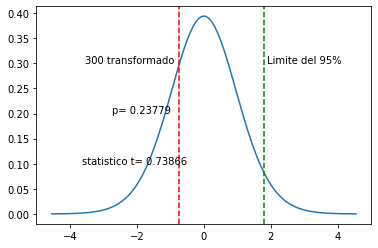

In [ ]:
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np

rv = st.t(df=20, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.plot(x,y)
plt.axvline(st.t(df=df).ppf(p), color='r', ls='--')
plt.text(st.t(df=df).ppf(p)-2.8, 0.3, '300 transformado')
plt.text(st.t(df=df).ppf(p)-2, 0.2, f'p= {round(p,5)}')
plt.text(st.t(df=df).ppf(p)-2.9, 0.10, f'statistico t= {round(t,5)}')
plt.axvline(st.t(df=df).ppf(0.95), color='g', ls='--')
plt.text(st.t(df=df).ppf(0.95)+0.1, 0.3, 'Limite del 95%')
plt.show()

## Ejemplo empleando scipy
Scipy posee funciones y metodos especializados para pruebas de hipotesis en caso de una cola posee la funcion ttest_1samp.

In [ ]:
st.ttest_1samp(a=sample, popmean=300, alternative='greater')

Ttest_1sampResult(statistic=0.7386612797693697, pvalue=0.23778922735685531)

Aca se evalua la cola mayor en el parametro **alternative** debido a que se quiere saber si la nueva muestra tiene una media **mayor** a 300.

## Conclusion pruebas de hipotesis en una cola
Hasta el momento solo se realizaron pruebas de hipotesis con una sola cola tanto en la distribucion normal como en la distribucion t-student, de modo que cabe resaltar algo muy importante y es que en ambos casos de distribucion(normal - t-student) la prueba de hipotesis en una sola cola aplica para saber si la media de una muestra es diferente a la media de poblacional, retomando el ejemplo anterior la media "hipotetica" de 300 viene a ser realmente la media de la poblacion, de modo que lo que se busca saber es si la media de la nueva muestra difiere de la media de la poblacion.

# T-student para dos muestras
Hasta ahora hemos trabajado haciendo analisis de una sola muestra pero si lo hacemos empleando dos muestras a la vez todo cambia ya que cada muestra posee su propia variacion y es algo a tener en cuenta.

Dada esta situacion es mejor emplear formas algebraicas para trabajar con ambas muestras, las cuales son diferentes a las anteriormente empleadas.

De este modo tambien tenemos tres posibles casos de t-student para dos muestras, estas son:

- Para muestras de igual varianza.
- Para muestras de diferentes varianzas.
- Para muestras pares.

Por ultimo otra cosa a tener en cuenta es que las formas de plantear las hipotesis cambia y tambien las condiciones.



## Pasos para definir hipotesis empleando dos muestras

Ahora la forma de definir pruebas de hiptesis es muy similar pero posee alguna diferencias en la nomenclatura.

|Hipotesis|Dos colas(muestras diferentes)|Una cola positiva(mayor)|Una cola negativa(menor)|
|---|---|---|---|
|$H_0$|$H_0: \mu_1 - \mu_2 = 0$|$H_0: \mu_1 - \mu_2= 0$|$H_0: \mu_1 - \mu_2 = 0$|
|$H_a$|$H_a: \mu_1 - \mu_2 \ne 0$|$H_a: \mu_1 - \mu_2 > 0$|$H_a: \mu_1 - \mu_2 < 0$|

Donde:

- $H_0$, es la hipotesis nula.
- $H_a$, es la hipotesis alterna.
- $\mu_1$, es la media de la primera muestra.
- $\mu_2$, es la media de la segunda muestra.

## Para dos muestras independientes con varianzas diferentes

### Condiciones

En este caso las condiciones seran unicamente para datos numericos, esto es debido a que este tipo de pruebas se usan principalmente para datos numericos.

- Supuesto de independencia: los valores muestreados deben ser independientes entre sí.

- Condición de aleatorización: los datos deben ser representativos de la población y seleccionados al azar.

- 10% Condición: el tamaño de la muestra, n, no debe ser mayor al 10% de la población.

- Condición Casi Normal: Los datos provienen de una distribución que es unimodal y simétrica. Esto se puede comprobar haciendo un histograma. Los modelos t de Student no funcionarán con datos muy sesgados.

- Suposición de grupos independientes: para usar los métodos t de dos muestras, los dos grupos que estamos comparando deben ser independientes entre sí. Debe pensar en cómo se recopilaron los datos.

### Error standard
La formula de error standard en este caso es diferente ya que se trabaja con ambas muestras, esta formula modificada tiene la siguiente forma:

$$se(\hat{y_1}-\hat{y_2}) = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

Donde:

- $se$, es el error standard de las muestras.
- $s^2_1$, es la desviacion standard de la primera muestra.
- $s^2_2$, es la desviacion standard de la segunda muestra.
- $n_1$, es el tamaño de la primera muestra.
- $n_2$, es el tamaño de la segunda muestra.

### Grados de libertad(degrees of freedom)

La formla para los grados de libertad tambien cambia en este caso y obtiene la formula:

$$df = \frac{(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{1}{n_1 - 1} \cdot (\frac{s^2_1}{n_1})^2 + \frac{1}{n_2 - 1} \cdot (\frac{s^2_2}{n_2})^2}$$

Donde:

- $s^2_1$, es la desviacion standard de la primera muestra.
- $s^2_2$, es la desviacion standard de la segunda muestra.
- $n_1$, es el tamaño de la primera muestra.
- $n_2$, es el tamaño de la segunda muestra.

### Valor t(t-score)

Una cosa mas cuya formula cambia al trabajar con dos muestras independientes es la del valor t, la cual posee ahora la siguiente formula:

$$t = \frac{(\hat{y}_1 - \hat{y}_2)}{se(\hat{y}_1 - \hat{y}_2)}$$

Donde:

- $\hat{y}_1$, es la media de la primera muestra.
- $\hat{y}_2$, es la media de la segunda muestra.
- $se(\hat{y}_1 - \hat{y}_2)$, es el error standard de ambas muestras.

### Data

Para los ejemplos a realizar crearemos data empleando distribuciones normales, las cuales seran las empleadas como muestras para dichos ejemplos.

In [ ]:
import scipy.stats as st
import numpy as np

samp1 = st.norm.rvs(loc= 50, scale= 20, size=300, random_state=10)
samp2 = st.norm.rvs(loc= 70, scale= 30, size=400, random_state=10)

### Intervalos de confianza
Anteriormente hicimos intervalos de confianza empleando una sola muestra para calcular la media poblacional, pero que pasa si tenemos dos muestras y queremos hallar los intervalos de confianza, en este caso tenemos que imaginar el rango de diferencia entre las medias de ambas muestras, la formula aca es la siguiente:

$$CI = (\hat{y}_1 - \hat{y}_2) \pm t_{df} \cdot se(\hat{y}_1 - \hat{y}_2)$$

#### Ejemplo empleando valores t

Esta es la opcion mas larga debido a que hoy en dia existen paquetes estadisticos que pueden realizar esta tarea de forma mucho mas facil.

##### Media($\mu$)

In [ ]:
mu1 = np.mean(samp1)
mu2 = np.mean(samp2)

mu1, mu2

(50.831388575601544, 71.53224409377157)

##### Desviacion standard($s$)

In [ ]:
stdev1 = np.std(samp1, ddof=1)
stdev2 = np.std(samp2, ddof=1)
stdev1, stdev2

(19.169149477803543, 28.570832033088056)

##### Tamaño de la muestra($n$)

In [ ]:
n1 = len(samp1)
n2 = len(samp2)
n1, n2

(300, 400)

##### Error standard($se$)

$$se(\hat{y_1}-\hat{y_2}) = \sqrt{\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2}}$$

In [ ]:
se = np.sqrt((stdev1**2/n1) + (stdev2**2/n2))
se

1.807093083748569

##### Grados de libertad($df$)

$$df = \frac{(\frac{s^2_1}{n_1} + \frac{s^2_2}{n_2})^2}{\frac{1}{n_1 - 1} \cdot (\frac{s^2_1}{n_1})^2 + \frac{1}{n_2 - 1} \cdot (\frac{s^2_2}{n_2})^2}$$

In [ ]:
df_f = ((stdev1** 2/n1) + (stdev2**2/n2)) ** 2
df_s = ((1/(n1-1)) * (stdev1**2/n1) ** 2) + ((1/(n2-1)) * (stdev2**2/n2) ** 2) 
df = df_f / df_s
df

689.9986911193871

##### Valor t($t$)

$$t = \frac{(\hat{y}_1 - \hat{y}_2)}{se(\hat{y}_1 - \hat{y}_2)}$$

In [ ]:
t = (mu1-mu2) / se
t

-11.455334373384304

##### $t_{df}$

Para obtener este valor es necesario obtener el valor dentro del 97.5% de la distribucion, esto debido a que se trata de ver los intervalos dentro de dos colas. 

In [ ]:
t_df = st.t(df=df).ppf(0.975)
t_df

1.96340800149184

##### Intervalo de Confianza

$$CI = (\hat{y}_1 - \hat{y}_2) \pm t_{df} \cdot se(\hat{y}_1 - \hat{y}_2)$$

In [ ]:
ci_lower = (mu1 - mu2) - t_df * se
ci_higher = (mu1 - mu2) + t_df * se

ci_lower, ci_higher

(-24.248916538242526, -17.15279449809752)

#### Ejemplo empleando paquetes estadisticos(pingouin)

El paquete estadistico **pingouin** nos muestra los intervalos de confianza en la columna **CI95%**.

In [ ]:
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pingouin as pg

pg.ttest(samp1, samp2, paired= False, alternative='two-sided', correction= True, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.455334,689.998691,two-sided,6.178651e-28,"[-24.25, -17.15]",0.82868,4.825e+24,1.0


#### Barras de error(error bars)

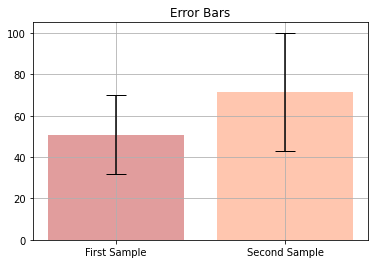

In [ ]:
error = [stdev1, stdev2]
means = [mu1, mu2]
labels = ['First Sample', 'Second Sample']
colors = ['IndianRed', 'LightSalmon']

plt.bar(x= labels, height= means, yerr= error, capsize=10, color= colors, alpha=0.6)
plt.title('Error Bars')
plt.grid()
plt.show()

### Pruebas de hipotesis

Anteriormente hicimos pruebas de hipotesis, las cuales en este caso son iguales de forma intuitiva pero al ser de dos muestras diferentes existen ciertas diferencias.

De todos modos vamos a emplear los mismos pasos:

- Establecer la hipotesis nula y la alterna.
- Revisar si cumple con las condiciones.
- Calcular las mecanicas:
  - Error standard para muestras y desviacion estandard para poblaciones.
  - Calcular el estadistico t(para distribucion normal estadistico z).
- Tomar una decision.

#### Estableciendo hipotesis

Como un ejemplo imaginemos si es que ambas muestras son diferentes de modo que las hipotesis seran:

|Hipotesis nula dos muestras($H_0$)|Hipotesis alterna dos muestras($H_a$)|
|---|---|
|$H_0: \mu_1 - \mu_2 = 0$|$H_a: \mu_1 \ne \mu_2 = 0$|

Esto implica un analisis de dos colas.

#### Revisando si cumple con las condiciones

Supongamos que ambas muestras son normales, lo cual son debido a que las hicimos de simulando una distribucion normal.

#### Calcular las mecanicas

##### Error standard

In [ ]:
se

1.807093083748569

##### Calculando el estadistico t

In [ ]:
t

-11.455334373384304

#### Obteniendo valores p

Aca podemos obtener los valores p los cuales nos indican donde se encuentra la media de la segunda muestra dentro de la primera muestra, al ser el analisis de dos colas es necesario multiplicar el resultado por 2.

In [ ]:
p = st.t(df=df).cdf(t) * 2
p

6.1786505595672985e-28

#### Ejemplo empleando paquetes estadisticos(scipy.stats - pingouin)

Anteriormente obtuvimos el resultado empleando valores t pero tambien es posible obtener el mismo resultado empleando paquetes estadisticos tales como **scipy y pingouin(usado anteriormente)**.

In [ ]:
st.ttest_ind(samp1, samp2, equal_var= False)

Ttest_indResult(statistic=-11.455334373384304, pvalue=6.178650559567212e-28)

In [ ]:
# El valor p esta en la columna p-val.

pg.ttest(samp1, samp2, paired= False, alternative='two-sided', correction= True, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-11.455334,689.998691,two-sided,6.178651e-28,"[-24.25, -17.15]",0.82868,4.825e+24,1.0


#### Decision

En caso de emplear un nivel de confianza de 95% es posible fallar en rechazar la hipotesis nula y afirmar que ambas muestras son diferentes ya que el valor p es mucho menor a 5%

In [ ]:
format(p, '.30f')

'0.000000000000000000000000000618'

## Para dos muestras independientes con varianzas iguales

Este metodo debe ser empleado en caso de que las muestras tengan varianzas iguales o se tenga la sospecha de que esto suceda ya que realmente tener varianzas iguales es casi imposible, pero esta es una sospecha valida cuando se tienen dos muestras de una misma poblacion, de modo que si ambas muestras son una poblacion es de esperar que sus varianzas sean iguales.

### Condiciones

- Supuesto de varianza igual: las varianzas de las dos poblaciones de las que se extrajeron las muestras son iguales. Eso es, $\sigma^2_1 = \sigma^2_2$.

- Supuesto de independencia: los datos de cada grupo deben extraerse de forma independiente y aleatoria de la propia población homogénea de cada grupo o generarse mediante un experimento comparativo aleatorio.

- Condición de aleatorización: los datos deben ser representativos de la población y seleccionados al azar.

- Condición del 10%: por lo general, no verificamos esta condición para diferencias de medias a menos que la población sea extremadamente pequeña o la muestra sea extremadamente grande.

- Condición Casi Normal: Los datos provienen de una distribución que es unimodal y simétrica. Esto se puede comprobar haciendo un histograma. Debe marcar esta condición para ambos grupos.

- Supuesto de grupos independientes: los dos grupos que estamos comparando deben ser independientes entre sí. Debe pensar en cómo se recopilaron los datos.

### Varianza

La varianza es muy importante para este metodo ya que sera empleada para obtener el error standard. Esta posee la siguiente formula:

$$s^2_{pooled} = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{(n_1 - 1) + (n_2 - 1)}$$

### Error standard

Cuando hablamos de dos muestras con varianzas iguales la formula del error standard cambia y esta adopta la siguiente forma:

$$se_{pooled}(\hat{y_1}-\hat{y_2}) = s_{pooled}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

Donde:

- $\hat{y_1}$, es la media de la primera muestra.
- $\hat{y_2}$, es la media de la segunda muestra.
- $n_1$, es el tamaño de la primera muestra.
- $n_2$, es el tamaño de la segunda muestra.
- $s_{pooled}$, es la desviacion standard de la varianza $\sqrt{s^2_{pooled}}$

### Grados de libertad(degrees of freedom)

En este caso tambien la formula de los grados de libertad cambia y obtiene la siguiente forma:

$$df_{pooled} = n_1 + n_2 - 2$$

Donde:

- $n_1$, es el tamaño de la primera muestra.
- $n_2$, es el tamaño de la segunda muestra.

### Valor t(t-score)

Por ultimo tambien la formula para obtener los valores t cambia tambien, se convierte en la siguiente:

$$t_{pooled} = \frac{(\hat{y_1} - \hat{y_2}) - \Delta_0}{se_{pooled}(\hat{y_1} - \hat{y_2})}$$

Donde:

- $\hat{y_1}$, es la media de la primera muestra.
- $\hat{y_2}$, es la media de la segunda muestra.
- $se_{pooled}$, es el error standard.
- $\Delta_0$, es la diferencia hipotetica que en la mayoria de los casos es igual a 0(realmente casi siempre).

### Data

Al igual que con el ejemplo anterior vamos a crear dos muestras para poder ejemplificar este metodo, para esto emplearemos igualmente la distribucion normal y supondremos que ambas muestras vienen de la misma poblacion.

In [ ]:
import scipy.stats as st
import numpy as np

samp1 = st.norm.rvs(loc= 50, scale= 20, size=200, random_state=10)
samp2 = st.norm.rvs(loc= 70, scale= 15, size=350, random_state=10)

### Intervalos de confianza

En este caso la formula es la misma que la anterior siendo esta de la siguiente forma:

$$CI = (\hat{y}_1 - \hat{y}_2) \pm t_{df} \cdot se(\hat{y}_1 - \hat{y}_2)$$

En este caso es importante mencionar que trabajaremos con la segunda muestra como muestra principal a diferencia de el anterior ejemplo donde se trabajo con la primera muestra como muestra principal.

#### Ejemplo empleando valores t

Esta es la opcion mas larga debido a que hoy en dia existen paquetes estadisticos que pueden realizar esta tarea de forma mucho mas facil.

##### Media($\mu$)

In [ ]:
m1 = np.mean(samp1)
m2 = np.mean(samp2)

m1, m2

(51.486138466333685, 70.97538457129686)

##### Desviacion standard($s$)

In [ ]:
stdev1 = np.std(samp1, ddof=1)
stdev2 = np.std(samp2, ddof=1)

stdev1, stdev2

(19.573864203430276, 14.481068658689452)

##### Tamaño de la muestra($n$)

In [ ]:
n1 = len(samp1)
n2 = len(samp2)

n1, n2

(200, 350)

##### Varianza($s^2_{spooled}$)

$$s^2_{pooled} = \frac{(n_1 - 1)s^2_1 + (n_2 - 1)s^2_2}{(n_1 - 1) + (n_2 - 1)}$$

In [ ]:
s_pooled = (((n2 - 1) * stdev2 ** 2) + ((n1 - 1)* stdev1 ** 2)) / ((n2 - 1) + (n1 - 1))
s_pooled

272.6822386600385

##### Error standard($se$)

$$se_{pooled}(\hat{y_1}-\hat{y_2}) = s_{pooled}\sqrt{\frac{1}{n_1} + \frac{1}{n_2}}$$

In [ ]:
se_pooled = np.sqrt(s_pooled) * np.sqrt((1/n2) + (1/n1))
se_pooled

1.463729245372055

##### Grados de libertad($df$) 

$$df_{pooled} = n_1 + n_2 - 2$$

In [ ]:
df_pooled = n2 + n1 - 2
df_pooled

548

##### Valor t($t$)

$$t_{pooled} = \frac{(\hat{y_1} - \hat{y_2}) - \Delta_0}{se_{pooled}(\hat{y_1} - \hat{y_2})}$$

In [ ]:
t_pooled = ((m2 - m1) - 0) / se_pooled

t_pooled

13.314789033957807

##### $t_{df}$

In [ ]:
t_df = st.t(df=df_pooled).ppf(0.975)
t_df

1.9643023609921546

##### Intervalos de confianza

$$CI = (\hat{y}_1 - \hat{y}_2) \pm t_{df} \cdot se(\hat{y}_1 - \hat{y}_2)$$

In [ ]:
lower = (m2 - m1) - (t_df * se_pooled)
higher = (m2 - m1) + (t_df * se_pooled)

lower, higher

(16.61403929242558, 22.364452917500763)

#### Ejemplo empleando paquetes estadisticos(pingouin)

El paquete estadistico **pingouin** nos muestra los intervalos de confianza en la columna **CI95%**. Otra cosa importante es que aqui usamos la opcion **alternative ='two-sided'** ya que aqui estamos interesados en los intervalos de confianza.

In [ ]:
import pingouin as pg

pg.ttest(samp2, samp1, paired= False, alternative='two-sided', correction= False, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.314789,548,two-sided,3.037964e-35,"[16.61, 22.36]",1.18023,6.915e+31,1.0


### Pruebas de hipotesis

Algo importante hasta aqui es que para este metodo hemos empleado la segunda muestra como muestra principal, de modo que buscaremos la media de primera muestra dentro de la distribucion de la segunda muestra para saber si la primer distribucion es mayor, de modo que emplearemos una prueba de una cola positiva.

Con las pruebas de hipotesis vamos a emplear los mismos pasos, ya que estos no cambian:

- Establecer la hipotesis nula y la alterna.
- Revisar si cumple con las condiciones.
- Calcular las mecanicas:
  - Error standard para muestras y desviacion estandard para poblaciones.
  - Calcular el estadistico t(para distribucion normal estadistico z).
- Tomar una decision.

#### Estableciendo hipotesis

Aqui como ya se menciono se hara un analisis de la cola positiva de modo que:

|Hipotesis nula para dos muestras($H_0$)|Hipotesis alterna para dos muestras($H_a$)|
|---|---|
|$H_0: \mu_1 - \mu_2= 0$|$H_a: \mu_1 - \mu_2 > 0$|

#### Revisando si cumple con las condiciones

En este caso vamos a suponer que cumple con todas las condiciones, ademas de partir ambas muestras de una distribucion normal.

#### Calculando mecanicas

##### Error standard

In [ ]:
se_pooled

1.463729245372055

##### Calculando estadistico t

In [ ]:
t_pooled

13.314789033957807

#### Obteniendo valores p
En esta ocasion emplearemos **sf en lugar de cdf**, esto ya que se trata de una prueba de cola positiva.

In [ ]:
p = st.t(df=df_pooled).sf(t_pooled)
p

1.5189822092735304e-35

#### Ejemplo empleando paquetes estadisticos(scipy.stats - pingouin)

Anteriormente obtuvimos el resultado empleando valores t pero tambien es posible obtener el mismo resultado empleando paquetes estadisticos tales como **scipy y pingouin(usado anteriormente)**.

In [ ]:
st.ttest_ind(samp2, samp1, equal_var= True, alternative='greater')

Ttest_indResult(statistic=13.314789033957805, pvalue=1.5189822092735304e-35)

In [ ]:
import pingouin as pg

# Notese que aqui los intervalos de confianza van hasta el infinito, eso se debe a que alternative= 'greater'.

pg.ttest(samp2, samp1, paired= False, alternative='greater', correction= False, confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,13.314789,548,greater,1.518982e-35,"[17.08, inf]",1.18023,1.383e+32,1.0


#### Decision

Empleando un nivel de confianza de 95% es posible fallar en rechazar la hipotesis nula, esto debido a que el valor p obtenido es mucho menor a 5%.

In [ ]:
format(p, '.40f')

'0.0000000000000000000000000000000000151898'

## Para dos muestras pareados
Hasta este punto hemos trabajado con hipotesis de una muestra, comparando esta muestra con la poblacion, tambien hemos trabajado con dos muestras independientes, pero que pasa si nuestras medias estan relacionadas o pareadas, imaginemos que tomamos dos muestras una de un grupo de personas antes de una dieta, y luego otra del mismo grupo de personas pero despues de la dieta, en este caso las muestras son pares debido a que son dos muestras que parten de una misma y es debido a esto que ambas muestras deben tener tamaños iguales, a su vez las hipotesis tienen la siguiente forma:

||||
|---|---|---|
||||

### Condiciones

- Suposición de datos pareados: los datos de cada grupo deben recopilarse en pares o las observaciones de un grupo deben estar naturalmente relacionadas con las observaciones del otro grupo.

- Supuesto de independencia: las diferencias deben ser independientes entre sí.

- Condición de aleatorización: los pares deben ser de una muestra aleatoria.

- 10% Condición: no debe muestrearse más del 10% de la población.

- Condición Casi Normal: compruebe que el histograma de las diferencias es casi normal.

### Diferencias pareadas(pairwise differences)

En este caso especial es necesario hallar las diferencias pareadas, las cuales son las diferencias de cada item dentro de las muestras, de la siguiente forma:

|Muestra 1|Muestra 2|Diferencia pareada|
|---|---|---|
|10|12|-2|
|13|10|3|
|6| 7| -1|
|16|5|11|
|14|12|2|
||.||
||.||
||.||

### Error standard

El error standard en este caso adopta una formula simple, la cual tiene la siguiente forma:

$$se(\hat{d}) = \frac{s_d}{\sqrt{n}}$$

Donde:

- $s_d$, es la desviacion standard de las diferencias pareadas
- $n$, es el tamaño de la muestra.

### Valor t(t-score)

Para poder obtener el valor t es necesario emplear la siguiente formula:

$$t_{n-1} = \frac{\hat{d} - \Delta_0}{se(\hat{d})}$$

Donde:

- $\hat{d}$, es la media de las diferencias pareadas.
- $\Delta_0$, este valor es casi siempre 0, esta es la diferencia hipotetica.
- $se(\hat{d})$, es el error standard de las diferencias pareadas.

### Grados de libertad(Degrees of freedom)

En este caso los grados de libertad adoptan la simpleza de la prueba t de una sola muestra, de modo que:

$$df = n - 1$$

Donde:

- $n$, es el tamaño de la muestra.

### Data 

En este caso vamos a simular dos muestras normales bajo las condiciones antes establecidas, de modo que tenemos una muestra que es la cantidad de kilos ganados por un grupo de personas antes de iniciar cierto regimen alimenticio y la segunda muestra es del mismo grupo de personas despues de dos meses siguiendo el regimen alimenticio. 

In [ ]:
import scipy.stats as st
import numpy as np

samp1_pair = st.norm.rvs(loc= 10, scale= 4, size=200, random_state=10)
samp2_pair = st.norm.rvs(loc= 8, scale= 5, size=200, random_state=10)

#### Intervalos de confianza 

La formula para hallar los intervalos de confianza es la siguiente:

$$df = \hat{d} \pm t_{df} \cdot{SE(\hat{d})}$$

##### Diferencias pareadas

In [ ]:
pw = samp1_pair - samp2_pair

##### Error standard

$$se(\hat{d}) = \frac{s_d}{\sqrt{n}}$$

In [ ]:
se_paired = np.std(pw, ddof=1) / np.sqrt(len(pw))
se_paired

0.06920406056135085

##### Estadistico t

$$t_{n-1} = \frac{\hat{d} - \Delta_0}{se(\hat{d})}$$

In [ ]:
t_paired = np.mean(pw) / se_paired
t_paired

27.826301824820646

##### Grados de libertad(degrees of freedom)

$$df = n - 1$$

In [ ]:
df_paired = len(samp1_pair) - 1
df_paired

199

##### $t_{df}$

In [ ]:
t_df_paired = st.t(df_paired).ppf(0.975)
t_df_paired

1.971956544249395

##### Intervalo de confianza

$$df = \hat{d} \pm t_{df} \cdot{SE(\hat{d})}$$

In [ ]:
higher = np.mean(pw) + (t_df_paired  * se_paired)
lower = np.mean(pw) - (t_df_paired  * se_paired)

lower, higher

(1.7892256765707286, 2.062160476795903)

#### Ejemplo empleando paquetes estadisticos(pingouin)

El paquete estadistico **pingouin** nos muestra los intervalos de confianza en la columna **CI95%**. Otra cosa importante es que aqui usamos la opcion **alternative ='two-sided'** para evitar obtener in inf en algun lado del intervalo.

In [ ]:
pg.ttest(samp1_pair, samp2_pair, paired= True, alternative='two-sided', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,27.826302,199,two-sided,1.607972e-70,"[1.79, 2.06]",0.434574,7.989e+66,1.0


### Pruebas de hipotesis

Algo importante hasta aqui es que para este metodo hemos empleado la segunda muestra como muestra principal, de modo que buscaremos la media de primera muestra dentro de la distribucion de la segunda muestra para saber si la media de la segunda muestra es menor a la de la primera, de modo que emplearemos una prueba de una cola negativa.

Aqui los pasos seran los siguientes:

- Establecer la hipotesis nula y la alterna.
- Revisar si cumple con las condiciones.
- Calcular las mecanicas:
  - Diferencia de datos pareados.
  - Error standard para muestras y desviacion estandard para poblaciones.
  - Calcular el estadistico t(para distribucion normal estadistico z).
- Tomar una decision.

#### Estableciendo hipotesis

Aqui como ya se menciono se hara un analisis de la cola positiva pero realmente en este caso es importante mencionar que el como establecer las hipotesis cambia y adopta la siguiente forma:

|Hipotesis|Dos colas(diferente)|Una cola positiva(mayor)|Una cola negativa(menor)|
|---|---|---|---|
|$H_0$|$H_0: \mu_d = \Delta_0$|$H_0: \mu_d= \Delta_0$|$H_0: \mu_d = \Delta_0$|
|$H_a$|$H_a: \mu_d \ne \Delta_0$|$H_a: \mu_d > \Delta_0$|$H_a: \mu_d < \Delta_0$|

Donde:

- $H_0$, es la hipotesis nula.
- $H_a$, es la hipotesis alterna.
- $\mu_d$, es la media de las diferencias pareadas.
- $\Delta_0$, es la diferencia hipotetica, que por lo general es 0.

Ahora nuestra hipotesis tendra la siguiente forma:

|Hipotesis nula para datos pareados($H_0$)|Hiotesis alterna para datos pareados($H_a$)|
|---|---|
|$H_0: \mu_d= \Delta_0$|$H_a: \mu_d < \Delta_0$|

Esto al emplear una cola negativa.

#### Revisando si cumple con las condiciones

En este caso vamos a suponer que cumple con todas las condiciones.

#### Calculando las mecanicas

##### Diferencia de datos pareados

In [ ]:
pw[:20]

array([0.6684135 , 1.28472103, 3.54540029, 2.00838385, 1.37866403,
       2.72008556, 1.73448841, 1.89145147, 1.99570857, 2.17460021,
       1.56697381, 0.79696263, 2.96506567, 0.97172592, 1.77136987,
       1.55486239, 3.13660221, 1.86486312, 0.515463  , 3.07980489])

##### Error standard

In [ ]:
se_paired

0.06920406056135085

##### Estadistico t

In [ ]:
t_paired

27.826301824820646

#### Obteniendo valores p

Algo importante aca es que emplearemos **-t_paired**, esto es por que aca vamos a buscar la media muestral de la segunda muestra dentro de la distribucion de la primera muestra.

In [ ]:
p_paired = st.t(df_paired).cdf(-t_paired)
p_paired

8.039862319234145e-71

#### Ejemplo empleando paquetes estadisticos(scipy.stats - pingouin)

Anteriormente obtuvimos el resultado empleando valores t pero tambien es posible obtener el mismo resultado empleando paquetes estadisticos tales como **scipy y pingouin(usado anteriormente)**.

In [ ]:
st.ttest_rel(samp2_pair, samp1_pair, alternative= "less")

Ttest_relResult(statistic=-27.826301824820646, pvalue=8.039862319234145e-71)

In [ ]:
pg.ttest(samp2_pair, samp1_pair, paired= True, alternative='less', confidence=0.95)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-27.826302,199,less,8.039862e-71,"[-inf, -1.81]",0.434574,1.598e+67,1.0


#### Decision

Empleando un nivel de confianza de 95% es posible fallar en rechazar la hipotesis nula, esto debido a que el valor p obtenido es mucho menor a 5%. Asi podemos afirmar que el regimen alimenticio have que las personas dentro del grupo aumenten de peso en menor grado.

## Nota Final

Algo uy importante hasta este momento es que hemos ido realizando pruebas de hipotesis empleando dos muestras, estas pruerbas pueden ser algo confusas cuando no se observa bien como se llevan a cabo, esto debido al orden de las variables al realizar las pruebas, en un caso es posible obtener un estadistico t positivo y en otro uno negativo, de este modo el como escoger las posiciones de las variables correctas es mediante el tipo de analisis a hacer, como ejemplo imaginemos que tenemos dos muestras uno con una media de 30 y el otro con una media de 25, de este modo si tomamos una prueba de cola superior positiva seria solo para probar que la primera muestra es superior a la segunda y necesitariamos obtener un estadistico t positivo, de otro modo en caso de tener un estadistico t negativo estariamos del otro lado de la distribucion, lo cual corresponde a una prueba de una cola negativa en la cual se trataria de saber si la segunda muestra es menor a la primera.

# Como emplear las pruebas de hipotesis

Hasta el momento se tienen las distribuciones normal y t-student con sus multiples variantes de modo que podemos graficar el camino para escoger la distribucion correcta.

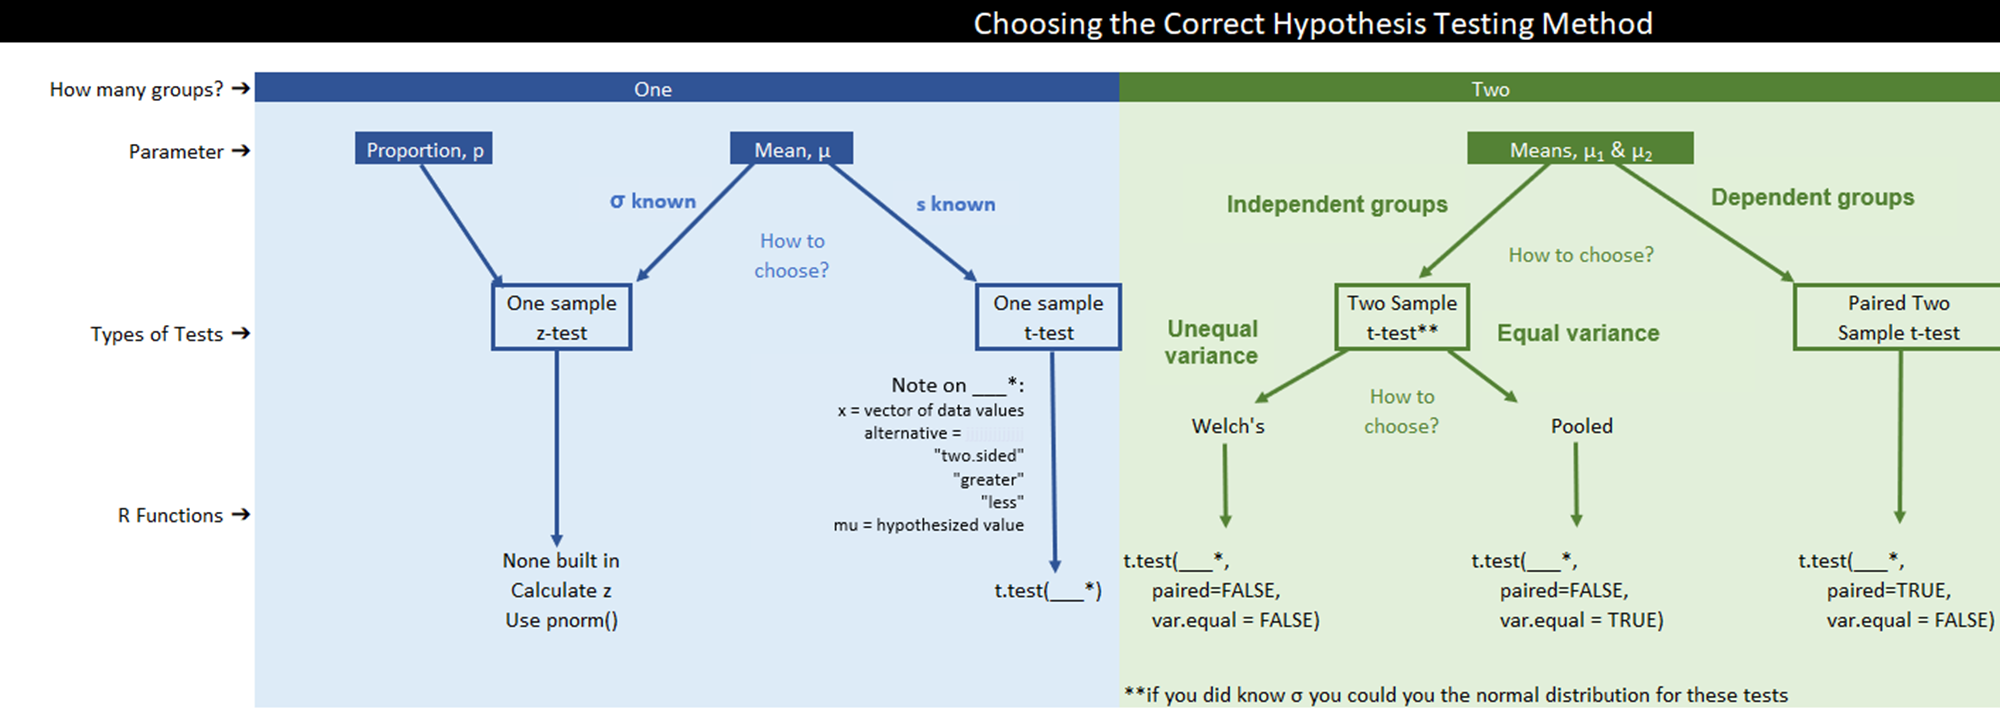